# Feature Importance
Using several algorithms to determine feature importance
Taken from: https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [31]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Reading dataset
observations = pd.read_csv("combined_joro_unbalanced.csv")

# Last column (classes)
Y = observations.iloc[: , -1]

# Droping lon/lat columns
X = observations.iloc[:, 0:19]

def displayImportanceSummary(columns, importance):
    for index, feature in enumerate(columns):
	    print('Feature: %s, Score: %.5f' %(feature, importance[index]))

In [2]:
print(X.shape, Y.shape)

(32189, 19) (32189,)


## Chi2
Filter method best suited for categorical data. https://www.youtube.com/watch?v=eciABhWBiUc

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

# Encode
label_encoder = LabelEncoder()

columns = X.columns
df = X

for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

# Feature extraction
chi_best = SelectKBest(score_func=chi2, k=6)
k_best = chi_best.fit(df, Y)

# Summarize scores
np.set_printoptions(precision=3)
#print(k_best.scores_)
displayImportanceSummary(columns,k_best.scores_)

Feature: Annual_mean_temp, Score: 704018.45162
Feature: MeanDiurnalRange, Score: 8452754.16341
Feature: Isothermality, Score: 2747502.47371
Feature: TempSeasonality, Score: 855014.39756
Feature: MaxTempWarmMo, Score: 29114.91579
Feature: MinTempColdMo, Score: 528976.22574
Feature: TempAnnRange, Score: 752705.71530
Feature: MeanTempWetQtr, Score: 1969254.23701
Feature: MeanTempDryQtr, Score: 13308.40465
Feature: MeanTempWarmQtr, Score: 63776.32603
Feature: MeanTempColdQtr, Score: 958721.12875
Feature: AnnPercip, Score: 1626042.31754
Feature: PercipWetMo, Score: 281327.83564
Feature: PercipDryMo, Score: 40834.30714
Feature: PercipSeasonality, Score: 1439556.26940
Feature: PrecipWetQtr, Score: 717493.27144
Feature: PrecipDryQtr, Score: 130884.00967
Feature: PrecipWrmQtr, Score: 1379083.57854
Feature: PrecipColdQtr, Score: 28325.41917


In [39]:
# Sumarize selected features.
# This are the best features alredy selected from the original datase
k_features = k_best.transform(df)
print(k_features)

[[ 5410  6970 13923  1268 13968   696]
 [ 6672 10444 15219  1264 13711   697]
 [ 2830  7759 14387  1315  6545   429]
 ...
 [13409  9258 13653    81 23701    67]
 [ 1280 28637 19244  2826   453   744]
 [15275 19157  2500   481 17930   287]]


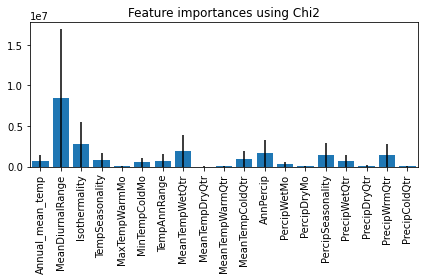

In [36]:
# plot feature importance
chi_importances = pd.Series(k_best.scores_, index=X.columns)

fig, ax = pyplot.subplots()
chi_importances.plot.bar(yerr=k_best.scores_, ax=ax)
ax.set_title("Feature importances using Chi2")
fig.tight_layout()

pyplot.bar([x for x in range(len(k_best.scores_))], k_best.scores_)
pyplot.show()

## Linear Regression
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

In [27]:
# linear regression feature importance
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns = X.columns
for col in columns:
    X[col] = label_encoder.fit_transform(X[col])

# define the model
model = LinearRegression()
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_
# summarize feature importance
displayImportanceSummary(model.feature_names_in_, importance)


Feature: Annual_mean_temp, Score: -0.00002
Feature: MeanDiurnalRange, Score: 0.00002
Feature: Isothermality, Score: -0.00003
Feature: TempSeasonality, Score: 0.00001
Feature: MaxTempWarmMo, Score: 0.00004
Feature: MinTempColdMo, Score: -0.00006
Feature: TempAnnRange, Score: -0.00009
Feature: MeanTempWetQtr, Score: 0.00000
Feature: MeanTempDryQtr, Score: 0.00000
Feature: MeanTempWarmQtr, Score: -0.00001
Feature: MeanTempColdQtr, Score: 0.00006
Feature: AnnPercip, Score: -0.00001
Feature: PercipWetMo, Score: 0.00061
Feature: PercipDryMo, Score: 0.00179
Feature: PercipSeasonality, Score: -0.00000
Feature: PrecipWetQtr, Score: -0.00032
Feature: PrecipDryQtr, Score: -0.00072
Feature: PrecipWrmQtr, Score: 0.00048
Feature: PrecipColdQtr, Score: 0.00004


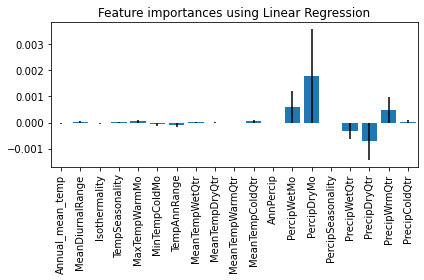

In [19]:
# plot feature importance
linear_importances = pd.Series(importance, index=X.columns)

fig, ax = pyplot.subplots()
linear_importances.plot.bar(yerr=importance, ax=ax)
ax.set_title("Feature importances using Linear Regression")
fig.tight_layout()

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Logistic Regression
Same assumption as in linear regression. Input variables have the same scale or have been scaled prior to fitting a model.  This is a "wrapper" method.

In [28]:
from sklearn.linear_model import LogisticRegression

# define the model
model = LogisticRegression(max_iter=5000)
# fit the model
model.fit(X, Y)
# get importance
importance = model.coef_[0]
# summarize feature importance
displayImportanceSummary(model.feature_names_in_, importance)

Feature: Annual_mean_temp, Score: -0.00024
Feature: MeanDiurnalRange, Score: -0.00079
Feature: Isothermality, Score: 0.00007
Feature: TempSeasonality, Score: 0.00085
Feature: MaxTempWarmMo, Score: 0.00594
Feature: MinTempColdMo, Score: -0.00580
Feature: TempAnnRange, Score: -0.00286
Feature: MeanTempWetQtr, Score: 0.00012
Feature: MeanTempDryQtr, Score: -0.00099
Feature: MeanTempWarmQtr, Score: -0.00146
Feature: MeanTempColdQtr, Score: 0.00325
Feature: AnnPercip, Score: 0.00118
Feature: PercipWetMo, Score: -0.00233
Feature: PercipDryMo, Score: 0.00038
Feature: PercipSeasonality, Score: -0.00007
Feature: PrecipWetQtr, Score: -0.00742
Feature: PrecipDryQtr, Score: -0.00168
Feature: PrecipWrmQtr, Score: 0.01458
Feature: PrecipColdQtr, Score: 0.00068


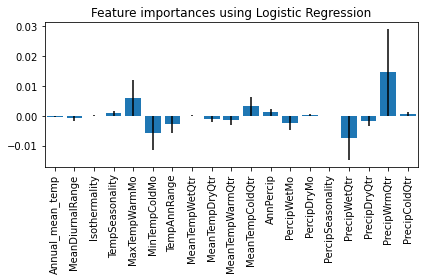

In [23]:
# plot feature importance
logistic_importances = pd.Series(importance, index=X.columns)

fig, ax = pyplot.subplots()
logistic_importances.plot.bar(yerr=importance, ax=ax)
ax.set_title("Feature importances using Logistic Regression")
fig.tight_layout()

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## Decision Trees: CART

In [29]:
from sklearn.tree import DecisionTreeRegressor
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_
# summarize feature importance
displayImportanceSummary(model.feature_names_in_, importance)

Feature: Annual_mean_temp, Score: 0.01933
Feature: MeanDiurnalRange, Score: 0.01947
Feature: Isothermality, Score: 0.11263
Feature: TempSeasonality, Score: 0.01172
Feature: MaxTempWarmMo, Score: 0.04120
Feature: MinTempColdMo, Score: 0.00954
Feature: TempAnnRange, Score: 0.02006
Feature: MeanTempWetQtr, Score: 0.04733
Feature: MeanTempDryQtr, Score: 0.03357
Feature: MeanTempWarmQtr, Score: 0.06458
Feature: MeanTempColdQtr, Score: 0.01487
Feature: AnnPercip, Score: 0.03289
Feature: PercipWetMo, Score: 0.02784
Feature: PercipDryMo, Score: 0.24359
Feature: PercipSeasonality, Score: 0.22947
Feature: PrecipWetQtr, Score: 0.01939
Feature: PrecipDryQtr, Score: 0.01848
Feature: PrecipWrmQtr, Score: 0.02552
Feature: PrecipColdQtr, Score: 0.00854


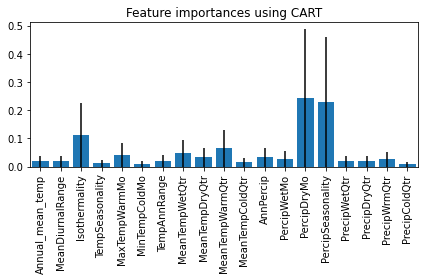

In [30]:
# plot feature importance
CART_importances = pd.Series(importance, index=X.columns)

fig, ax = pyplot.subplots()
CART_importances.plot.bar(yerr=importance, ax=ax)
ax.set_title("Feature importances using CART")
fig.tight_layout()

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()